**Tên: Lê Hoàng Đức**

**MSSV: 18110075**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
def one_hot_encoding(Y, num_classes):
    num_classes = len(np.unique(Y)) # Num classes
    one_hot_Y = np.zeros((len(Y), num_classes))
    one_hot_Y[np.arange(len(Y)), Y.reshape(-1)] = 1
    return one_hot_Y

def sigmoid(x):
    '''
    Computes sigmoid function for each element of array S.
    '''
    return 1 / (1 + np.exp(-x))

def gradient_sigmoid(a):
    '''
    Computes gradient vector for sigmoid layer.
    '''
    return  a * (1 - a)

def relu(h):
    return np.array([max(0,i) for i in h.reshape(-1)]).reshape(h.shape)

def softmax(z):
    return np.exp(z)/ np.sum(np.exp(z), axis=1).reshape(-1,1)

def CrossEntropy(o,y):
    return - np.sum(np.log(o)*y)

In [3]:
class nnet:
    def __init__(self, hid_layer_size=[5, 5], mb_size=32, learning_rate=1e-3, max_epoch=500):
        pass
        self.hid_layer_size = hid_layer_size
        self.mb_size = mb_size
        self.learning_rate = learning_rate
        self.max_epoch = max_epoch

        self.Ws = [] # Weight matrix
        self.bs = [] # bias list

        self.costs = [] # To save costs during training
        self.errs = [] # To save mean binary errors during training

        self.val_losses = [] # To save valid costs during validation
        self.val_errs = [] # # To save mean binary valid errors during validation
        
    def fit(self, X, y, valid_X, valid_y):
        pass
        self._train_nnet(X, y, valid_X, valid_y)
        return self
    
    def predict(self,X):
        pass
        A = self._compute_nnet_outputs(X, False)
        return np.argmax(A, axis=1)
    
    def _init_weight_matrix(self, X, Y, layer_sizes):
        pass
        #fix random for same result when init weight matrix
        np.random.seed(0) 
        self.Ws = np.array([np.random.randn(layer_sizes[i], layer_sizes[i + 1])
            for i in range(len(layer_sizes) - 1)]) # Init Ws
        print('Weight matrix shape: ', self.Ws[0].shape, self.Ws[1].shape, self.Ws[2].shape)
        self.bs = np.array([np.random.randn(layer_sizes[i+1]) for i in range(len(layer_sizes)-1)])
        print('bias vectors\' shape: ', self.bs[0].shape, self.bs[1].shape, self.bs[2].shape)
        

    def _compute_layer_sizes(self, X, Y, hid_layer_size):
        pass
        num_classes = len(np.unique(Y)) # Num classes
        layer_sizes = [X.shape[1]] + hid_layer_size + [num_classes]
        print('Layer Sizes: ',layer_sizes)
        return layer_sizes 

    def _compute_nnet_outputs(self, X, need_all_layer_outputs=True):
        pass
        '''
        Computes the outputs of Neural Net by forward propagating X through the net.
        '''

        Z1 = X @ self.Ws[0] + self.bs[0].reshape(1,-1)  
        A1 = relu(Z1)   

        A_prev = A1
        As = [A1]
        for i in range(1, len(self.hid_layer_size)):
            Zi = A_prev @ self.Ws[i] + self.bs[i].reshape(1,-1)
            Ai = relu(Zi)
            A_prev = Ai
            As.append(Ai)

        Z_last = A_prev @ self.Ws[-1] + self.bs[-1].reshape(1,-1) 
        A_last = softmax(Z_last) 

        As.append(A_last)

        if need_all_layer_outputs:
            return As
        else:
            return A_last

    def _updateWeights(self, Ws, bs, As, X, Y,  learning_rate):
        pass
        # Backpropagation

        # Gradient of J with softmax activate function
        dL_dz3 = 1/len(X)*(As[-1] - Y) # last (output) layer 
        dL_dW3 = np.dot(As[-2].T, dL_dz3)
        dL_db3 = np.sum(dL_dz3, axis = 0)
        
        dL_dzprev = dL_dz3 # The gradient of previous Z

        dL_dWs = [dL_dW3] # To save the gradients of weight matrices during backprop-process
        dL_dbs = [dL_db3] # To save the gradients of bias vectors during backprop-process

        # Gradient of J with relu activate functions
        for i in reversed(range(1,len(self.hid_layer_size))):
            zi = As[i-1] @ Ws[i] + bs[i].reshape(1,-1)
            dL_doi = np.dot(dL_dzprev, Ws[i+1].T)
            dL_dzi = dL_doi.copy()
            dL_dzi[zi < 0] = 0
            dL_dWi = np.dot(As[i-1].T, dL_dzi)
            dL_dbi = np.sum(dL_dzi, axis=0)

            dL_dzprev = dL_dzi

            dL_dWs.append(dL_dWi)
            dL_dbs.append(dL_dbi)

        z1 = X @ Ws[0] + bs[0].reshape(1,-1) # first hidden layer
        dL_do1 = np.dot(dL_dzprev, Ws[1].T)
        dL_dz1 = dL_do1.copy()
        dL_dz1[z1 < 0] = 0
        dL_dW1 = np.dot(X.T, dL_dz1)
        dL_db1 = np.sum(dL_dz1, axis = 0)

        dL_dWs.append(dL_dW1)
        dL_dbs.append(dL_db1)

        dL_dWs.reverse()
        dL_dbs.reverse()

        for i in range(len(dL_dWs)):
            Ws[i] -= learning_rate * dL_dWs[i]
            bs[i] -= learning_rate * dL_dbs[i]

        return Ws, bs   

    def _train_nnet(self, X, Y, X_valid, Y_valid):
        pass
        # Get layer sizes:
        layer_sizes = self._compute_layer_sizes(X, Y, self.hid_layer_size)


        # Prepare for training
        self._init_weight_matrix(X, Y, layer_sizes)
        one_hot_Y = one_hot_encoding(Y, layer_sizes[-1])
        one_hot_Y_valid = one_hot_encoding(Y_valid, layer_sizes[-1])
        
        N = len(X) # Num training examples
        rnd_idxs = list(range(N)) # Random indices   
        
        # Train
        for epoch in list(range(self.max_epoch)):
            # Shuffle index
            np.random.shuffle(rnd_idxs)
            for start_idx in list(range(0, N, self.mb_size)):
                # Get minibach
                mb_X = X[rnd_idxs[start_idx:start_idx+self.mb_size]]
                mb_Y = one_hot_Y[rnd_idxs[start_idx:start_idx+self.mb_size]]
                
                # Forward-prop
                As = self._compute_nnet_outputs(mb_X, True)
                
                # Back-prop; on the way, compute each layer's gradient and update its W
                self.Ws, self.bs = self._updateWeights(self.Ws, self.bs, As, mb_X, mb_Y, self.learning_rate)   

            
            # Compute training info, save it, and print it
            A = self._compute_nnet_outputs(X, False)
            A_valid = self._compute_nnet_outputs(X_valid, False)

            cost = np.mean(-np.sum(one_hot_Y * np.log(A), axis=1))
            err = np.mean(np.argmax(A, axis=1) == Y.squeeze())

            val_loss = np.mean(-np.sum(one_hot_Y_valid * np.log(A_valid),axis=1))
            val_acc = np.mean(np.argmax(A_valid, axis=1) == Y_valid.squeeze())

            self.costs.append(cost)
            self.errs.append(err)
            
            self.val_losses.append(val_loss)
            self.val_errs.append(val_acc)

            print('Epoch %d/%d [==============================] loss: %.3f - accuracy: %.4f - val_loss: %.4f - val_accuracy: %.4f' % (epoch, self.max_epoch, cost, err, val_loss, val_acc))



# Bài 1

In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-08/bt_train.csv")
valid = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-08/bt_valid.csv")

x1_train = train["x1"].values
x2_train = train["x2"].values
y_train = train["label"].values

x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values

# Normalize
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std


X_train = np.concatenate([x1_train.reshape(-1,1), x2_train.reshape(-1,1)], axis=1)
X_valid = np.concatenate([x1_valid.reshape(-1,1), x2_valid.reshape(-1,1)], axis=1)

In [5]:
model = nnet([5, 5], 32, 0.01, 3000)
model.fit(X_train, y_train, X_valid, y_valid)

Layer Sizes:  [2, 5, 5, 3]
Weight matrix shape:  (2, 5) (5, 5) (5, 3)
bias vectors' shape:  (5,) (5,) (3,)
Epoch 0/3000 [==============================] loss: 1.459 - accuracy: 0.3000 - val_loss: 1.2005 - val_accuracy: 0.3667
Epoch 1/3000 [==============================] loss: 1.011 - accuracy: 0.5744 - val_loss: 1.0832 - val_accuracy: 0.4267
Epoch 2/3000 [==============================] loss: 0.902 - accuracy: 0.6256 - val_loss: 1.0385 - val_accuracy: 0.4867
Epoch 3/3000 [==============================] loss: 0.849 - accuracy: 0.6278 - val_loss: 1.0109 - val_accuracy: 0.5133
Epoch 4/3000 [==============================] loss: 0.811 - accuracy: 0.6278 - val_loss: 0.9932 - val_accuracy: 0.5167
Epoch 5/3000 [==============================] loss: 0.783 - accuracy: 0.6322 - val_loss: 0.9785 - val_accuracy: 0.5167
Epoch 6/3000 [==============================] loss: 0.761 - accuracy: 0.6356 - val_loss: 0.9689 - val_accuracy: 0.5167
Epoch 7/3000 [==============================] loss: 0.742 - 

## Nhận xét và một vài chú ý:
1. Số tổng số layer cho toàn bộ nnet là 4 (tính cả hidden layers). Số lượng hidden layers là 2.
2. Lớp `nnet` được cài đặt chỉ dành cho việc sử dụng activate function là `relu` và output layer là `softmax`, chưa thể linh hoạt cho các activate function khác nhau. Nếu muốn sửa đổi, cần phải thay đổi mã nguồn. Tuy nhiên, có thể linh hoạt trong việc chọn số lượng hidden layer và số lượng hidden node tại mỗi layer. 
3. Nhìn vào kết quả của quá trình training, có thể thấy rằng độ chính xác của quá trình validation có tăng (so với code hướng dẫn, $\approx$ `61%`) thành $\approx$ `64%`. Tuy nhiên, nhìn vào độ chính xác trên tập train, có thể thấy hiện tượng `overfitting` xảy ra và hơn nữa loss trên tập valid vẫn còn lớn, vì thế có thể nói kết quả của mô hình chưa tốt. Để cải tiến: có thể  thử thay đổi activate functions, thêm dữ liệu, regularization.
4. Code chưa được cài đặt các kỹ thuật momentum gradient hay weight decay regularization. 
5. Train vẫn còn chậm do cài đặt thủ công, chưa thể tận dụng GPU cho phép nhân ma trận.



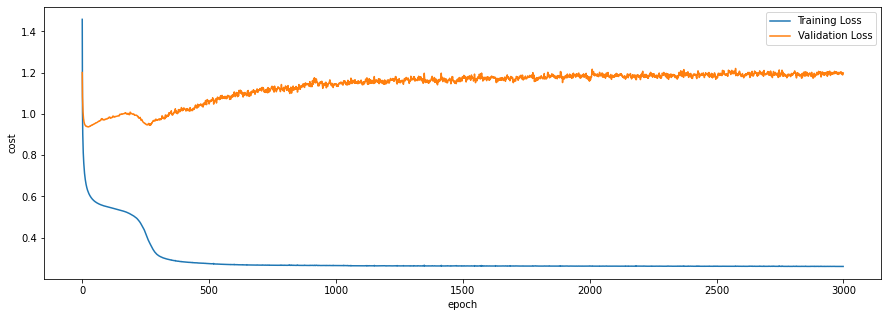

In [6]:
# Visualize results
epochs = np.arange(len(model.costs))
plt.figure(figsize=(15,5))
plt.plot(epochs, model.costs, label='Training Loss')
plt.plot(epochs, model.val_losses, label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(loc='best')
plt.show()

# Bài 2

In [7]:
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data  
y = breast_cancer.target

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.2, random_state=42)

X_mean=np.mean(X_train)
X_std=np.std(X_train)

X_valid=(X_valid-X_mean)/X_std
X_train=(X_train-X_mean)/X_std

In [8]:
model = nnet([10, 10, 10, 10, 10], 32, 0.01, 1000)
model.fit(X_train, y_train, X_valid, y_valid)

Layer Sizes:  [30, 10, 10, 10, 10, 10, 2]
Weight matrix shape:  (30, 10) (10, 10) (10, 10)
bias vectors' shape:  (10,) (10,) (10,)
Epoch 0/1000 [==============================] loss: 0.389 - accuracy: 0.8396 - val_loss: 0.3283 - val_accuracy: 0.9123
Epoch 1/1000 [==============================] loss: 0.665 - accuracy: 0.6549 - val_loss: 0.6558 - val_accuracy: 0.6228
Epoch 2/1000 [==============================] loss: 0.594 - accuracy: 0.6879 - val_loss: 0.5675 - val_accuracy: 0.6754
Epoch 3/1000 [==============================] loss: 0.410 - accuracy: 0.8791 - val_loss: 0.2553 - val_accuracy: 0.9298
Epoch 4/1000 [==============================] loss: 0.307 - accuracy: 0.8923 - val_loss: 0.2202 - val_accuracy: 0.9298
Epoch 5/1000 [==============================] loss: 0.301 - accuracy: 0.8813 - val_loss: 0.2189 - val_accuracy: 0.9211
Epoch 6/1000 [==============================] loss: 0.521 - accuracy: 0.8769 - val_loss: 0.2761 - val_accuracy: 0.9123
Epoch 7/1000 [======================

## Nhận xét:

1. Số hidden layers: 5, output layer: softmax
2. Số hidden nodes tại mỗi layer: 10.
3. Activate functions: relu (cho cả 5 hidden layers)

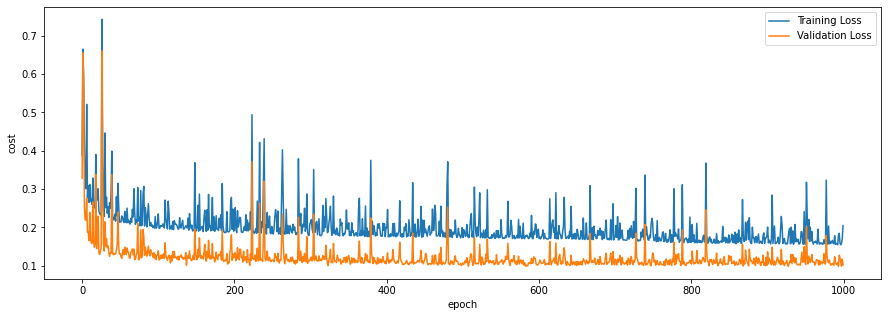

In [9]:
# Visualize results
epochs = np.arange(len(model.costs))
plt.figure(figsize=(15,5))
plt.plot(epochs, model.costs, label='Training Loss')
plt.plot(epochs, model.val_losses, label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(loc='best')
plt.show()